### Histogram


In [29]:
import random as rd
import statistics as st
import numpy.random as npr
import matplotlib.pyplot as plt

In [31]:
# input parameters
insurance_holder= 400
pr_insurance_claim = 0.04
pr_totaled = 0.3
min_cost = 3000
max_cost = 35000
likely_cost = 15000
repair_mean = 2000
repair_std = 400


In [33]:
trials = 10000
sample = list()
for i in range(trials):
    num_files= npr.binomial(insurance_holder,pr_insurance_claim)
    num_totaled= npr.binomial(num_files,pr_totaled)
    num_repair = num_files -num_totaled
    total_cost = 0.0
    for i in range(num_totaled):
        total_cost = total_cost + rd.triangular(min_cost,max_cost,likely_cost)
    for i in range(num_repair):
        total_cost = total_cost + rd.normalvariate(repair_mean,repair_std)
    sample.append(total_cost)
    

(array([3.210e+02, 1.889e+03, 3.259e+03, 2.640e+03, 1.342e+03, 4.170e+02,
        1.040e+02, 2.100e+01, 4.000e+00, 3.000e+00]),
 array([  5917.1430976 ,  40123.38481828,  74329.62653896, 108535.86825964,
        142742.10998033, 176948.35170101, 211154.59342169, 245360.83514237,
        279567.07686305, 313773.31858373, 347979.56030441]),
 <BarContainer object of 10 artists>)

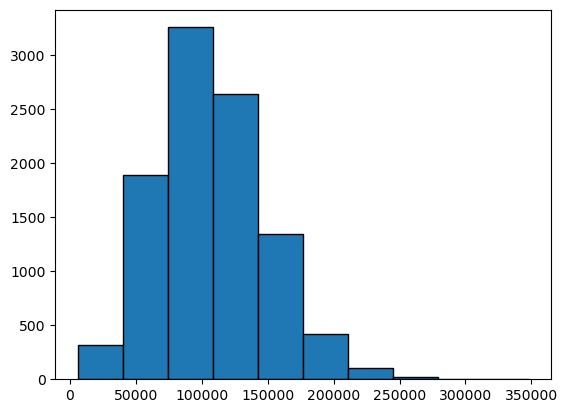

In [35]:
plt.hist(sample, edgecolor='k')

### Confidence Interval


In [37]:

sample_mean = st.mean(sample)
sample_std = st.stdev(sample)
print('Mean Total annual claims = %.2f' % st.mean(sample))
moe = 1.96*sample_std/(len(sample)**0.5)
lcl = sample_mean - moe
ucl = sample_mean + moe
print('The 95%% confidence interval for the true mean cost is (%6.2f, %6.2f)' % (lcl,ucl))

Mean Total annual claims = 107007.02
The 95% confidence interval for the true mean cost is (106201.11, 107812.94)


### Probability

In [39]:

proportion = sum(1 for x in sample if x > 160000) / len(sample)
print('There is a %5.2f%% chance of cost  exceeding $160000.' % (100*proportion))
moe = 1.645*(proportion*(1-proportion) / len(sample))**0.5
lcl = proportion - moe
if lcl < 0.0: lcl = 0.0
ucl = proportion + moe
print('The 90%% confidence interval for the probability of cost exceeding $160000 is (%6.4f, %6.4f).' % (lcl,ucl))


There is a 10.68% chance of cost  exceeding $160000.
The 90% confidence interval for the probability of cost exceeding $160000 is (0.1017, 0.1119).


In [50]:
for value in range(160000,210000,1000):
    proportion = sum( 1 for x in sample if x >= value)/len(sample)
    print ('Value: %6d   Probability:  %6.2f' %(value, proportion))

Value: 160000   Probability:    0.11
Value: 161000   Probability:    0.10
Value: 162000   Probability:    0.10
Value: 163000   Probability:    0.09
Value: 164000   Probability:    0.09
Value: 165000   Probability:    0.09
Value: 166000   Probability:    0.08
Value: 167000   Probability:    0.08
Value: 168000   Probability:    0.08
Value: 169000   Probability:    0.08
Value: 170000   Probability:    0.07
Value: 171000   Probability:    0.07
Value: 172000   Probability:    0.07
Value: 173000   Probability:    0.06
Value: 174000   Probability:    0.06
Value: 175000   Probability:    0.06
Value: 176000   Probability:    0.06
Value: 177000   Probability:    0.05
Value: 178000   Probability:    0.05
Value: 179000   Probability:    0.05
Value: 180000   Probability:    0.05
Value: 181000   Probability:    0.05
Value: 182000   Probability:    0.04
Value: 183000   Probability:    0.04
Value: 184000   Probability:    0.04
Value: 185000   Probability:    0.04
Value: 186000   Probability:    0.04
V

The level of asseys AAI need is at least $182000 to have 95% probability of pay its annual claims cost